# Warehouse Optimization 
This is the environment code for the **Warehouse Problem statement** <br > 
It is a simplistic ***reinforcement learning*** environment where we are giving rewards to the robot based on where it gets the requested items from. Though, the rewards are set based on the get requests, we need to optimize the ***store()*** function, such that it stores the items in the racks leading to an optimized ***get()*** function. 

In [1]:
import random 
import numpy as np 

import collections
import sys 
import matplotlib.pyplot as plt 

Number of racks and items as defined for the initial problem statement. <br /> 
'''
Making a global variable warehouse. 
It is a dictionary of the format: 
{ rack: (item, quantity) } 
'''

In [2]:
#nRacks = 12 
#nItems = 5 

#warehouse = {a: (0,0) for a in range(1, nRacks+1)} 

**Store()** to store a given (item, quantity) in a rack. <br > 
**Dictionary ->  rack: (item id, item quantity)** <br >

In [3]:
def cyclic(rack): 
    if rack == 1: 
        return 12 
    else: 
        return rack-1 


#for i in range(1,13):
#    print cyclic(i) 


In [4]:
def warehousefull(warehouse): 
    #global warehouse 
    count = 0 
    for i in range(1,13): 
        if (warehouse[i] == (0,0)): break 
        else: count = count + 1 
    if (count == 12): return True
    else: return False 
#print warehousefull() 

In [5]:
def Store(rack, item, quantity): 
    if (rack not in warehouse): print "No rack {} in warehouse".format(rack) # No such rack exists  
    elif warehouse[rack] == (0,0): # Empty rack 
         warehouse[rack] = (item, quantity) 
         print("Stored item {} Successfully in an empty rack {} ".format(item, rack)) 
    elif (warehouse[rack][0] == item): # Rack already has some qauntity of that item 
        warehouse[rack] = (item, warehouse[rack][1]+quantity) 
        print "Updated Quantity of item {} in rack {} ".format(item, rack) 
    elif (warehousefull(warehouse) == True): print "Warehouse is Full!" 
    else: # Some other item is in that rack 
        print "Item {} has occupied the rack {}. Kindly store item {} somehere else. Thank you :)".format(warehouse[rack][0], rack, item) 
        print "cycle rack:", str(cyclic(rack))
        Store(cyclic(rack), item, quantity) 



Initialize the warehouse 


In [6]:
def initialise_warehouse(): 
    global nRacks, nItems, warehouse 
    nRacks = 12 
    nItems = 5 

    warehouse = {a: (0,0) for a in range(1, nRacks+1)} #re-initailizing to (0,0) for each rack 

    Store(1, 1, 10) 
    Store(2, 3, 10) 
    Store(5, 2, 10) 
    Store(11, 5, 10) 
    Store(8, 4, 10) 
#initialise_warehouse() 

Utility function to **print the Warehouse's State** <br > 

1->(0, 0)   4->(0, 0)	7->(0, 0)	10->(0, 0)	
2->(0, 0)	5->(0, 0)	8->(0, 0)   11->(0, 0)	
3->(0, 0)	6->(0, 0)	9->(0, 0)	12->(0, 0)	


In [7]:
def print_warehouse(): 
    print 
    print "    I    " 
    print 
    for i in warehouse: 
        print str(i) + "->" + str(warehouse[i]) + "\t" 
        if i % 3 == 0: 
            print 
    print "    O    "
#initialise_warehouse() 
#print_warehouse() 

Rewards definition based on rack's location from the output (delivery) gate 

In [8]:
def rewards(rack): 
    ''' 
    if rack in range(1,4): return -400 
    elif rack in range(4,7): return -300 
    elif rack in range(7,10): return -200 
    elif rack in range(10,13): return -100 
    else: return 0 # Wrong rack 
    ''' 
    if rack in range(1,4): return 50 
    elif rack in range(4,7): return 200 
    elif rack in range(7,10): return 350 
    elif rack in range(10,13): return 500 
    else: return 0 # Wrong rack 


**Get()** function to search for a requested item in the warehouse and get (deliver) it to the delivery gate and return a corresponding immediate reward for it. 

In [9]:
def Get(item, quantity): 
    rack = 0
    for i in warehouse: 
        if item in warehouse[i]: 
             rack = i # Rack number 

    #immediate reward 
    reward = 0 



    if (rack == 0): print "Item {} not in warehouse".format(item) # No such rack exists  
    elif warehouse[rack] == (0,0): # Empty rack 
         print "Rack {} is an empty rack ".format(rack)
    elif (warehouse[rack][0] == item): # Rack already has some qauntity of that item 
        if (warehouse[rack][1] >= quantity): 
            warehouse[rack] = (item, warehouse[rack][1]-quantity) 
            #immediate reward 
            reward = rewards(rack)
            print "Delivery Successful" 
        else: 
            reward = rewards(rack) 
            warehouse[rack] = (0,0) 
            print "Quantity {} of item {} is unavailable currently. Delivered {} quantity as of now! ".format(quantity, item, warehouse[rack][1])
    else: # Some other item is in that rack 
        print "Item {} asked for is in rack {}. Kindly Get is from there. Thank you :)".format(item, rack) 

    return rack, reward 

    '''         
    done = False 
    info = 'info' 
    return [warehouse, reward, done, info] 
    ''' 

For testing the functions implemented till now :) 

In [10]:
def test(): 
    #testing Store() function 
    print "Testing Store() " 
    initialise_warehouse() 
    print_warehouse() 

    #further testing of Store() function 
    print "Further testing Store() " 
    Store(100, 4, 10) # No rack 100 
    Store(11,1,10) # Rack 11 already has item 5 
    print_warehouse() 

    # Testing of Get() function 
    print "Testing Get() " 
    print Get(5, 5) 
    print Get(4, 5) 
    print Get(2, 4) 

    print Get(11, 10) # No rack 100 
    print Get(1,100) # Rack 11 already has item 5 

    print_warehouse() 

#test() 

## Reinforcement Learning (RL) Strategies 

Running the ***RL script*** to accumulate the total rewards. <br > 
### Random Policy

In [11]:
def plot(array, title="Graph", xlabel="X-axis", ylabel="Y-axis"): 
    plt.title(title) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.plot(array) 
    plt.show() 
    #plt.close() 
#plot([1,2,3,4])

In [12]:
initialise_warehouse() # just in case something has been modified (global variables) 
print_warehouse() 

Stored item 1 Successfully in an empty rack 1 
Stored item 3 Successfully in an empty rack 2 
Stored item 2 Successfully in an empty rack 5 
Stored item 5 Successfully in an empty rack 11 
Stored item 4 Successfully in an empty rack 8 

    I    

1->(1, 10)	
2->(3, 10)	
3->(0, 0)	

4->(0, 0)	
5->(2, 10)	
6->(0, 0)	

7->(0, 0)	
8->(4, 10)	
9->(0, 0)	

10->(0, 0)	
11->(5, 10)	
12->(0, 0)	

    O    


In [13]:
def random_strategy(): 
    rack = random.randint(1,12)  
    return rack 

In [14]:
def requests(): 
  

    requests = [] 

    for i in range(10500): 
        r = ""
        if (random.uniform(0,1) <= 0.4): 
            r = r + "STORE " 
            r = r + "5 " + str(random.randint(1,5000))  
        else: 
            r = r + "GET " 
            r = r + "5 " + str(random.randint(1,1000))  

        requests.append(r) 

    
    for i in range(1250): 
        r = ""
        if (random.uniform(0,1) <= 0.6): 
            r = r + "STORE " 
            r = r + "3 " + str(random.randint(1,5000))  
        else: 
            r = r + "GET " 
            r = r + "3 " + str(random.randint(1,1000))  
        requests.append(r) 

    for i in range(2500): 
        r = ""
        if (random.uniform(0,1) <= 0.3): 
            r = r + "STORE " 
            r = r + "4 " + str(random.randint(1,5000))  
        else: 
            r = r + "GET " 
            r = r + "4 " + str(random.randint(1,1000))  
        requests.append(r) 

    for i in range(4250): 
        r = ""
        if (random.uniform(0,1) <= 0.5): 
            r = r + "STORE " 
            r = r + "2 " + str(random.randint(1,5000))  
        else: 
            r = r + "GET " 
            r = r + "2 " + str(random.randint(1,1000))  
        requests.append(r) 

    for i in range(6500): 
        r = ""
        if (random.uniform(0,1) <= 0.4): 
            r = r + "STORE " 
            r = r + "1 " + str(random.randint(1,5000))  
        else: 
            r = r + "GET " 
            r = r + "1 " + str(random.randint(1,1000))  
        requests.append(r) 

    





    ''' 
    requests = [] 
    for i in range(10000): 
        r = ""
        if (random.uniform(0,1) <= 0.4): r = r + "STORE " 
        else: r = r + "GET " 
        if random.uniform(0,1) < 0.25: 
            #to check whether the model is learning to store item 5 at a good (optimized) rack or not. 
            r = r + str(random.randint(1,4)) + " " + str(random.randint(1,1000))  
        else: r = r + "5 " + str(random.randint(1,1000))
              #r = r + str(random.randint(4,5)) + " " + str(random.randint(1,1000)) 
        requests.append(r) 
    #print requests[:2] 
    ''' 




    '''requests = ["STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000"] ''' 

    '''requests = ["STORE 4 1000", "STORE 5 1000", 
                "STORE 1 10000", "STORE 2 1000", 
                "STORE 3 1000", "STORE 2 1000", 
                "STORE 1 1000", "GET 4 20", "GET 4 20", "GET 4 20", "GET 4 20", "GET 4 20", 
                "GET 3 20", "GET 2 20", 
                "GET 1 20", "GET 5 20", "GET 5 20", "GET 5 20", 
                "STORE 4 100", "STORE 2 100", 
                "STORE 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", "STORE 1 100", "STORE 2 100", 
               "STORE 3 100", "STORE 4 100", "STORE 5 100", ] ''' 
    return requests 
#requests()

In [15]:
def total_rewards(): 
    total_rewards = 0 
    requests_list = requests() 
    for req in requests_list: 
        r = req.split(' ') 
        reward = 0 
        if (r[0].strip() == "STORE"): 
            rack = random_strategy() #random racks allocated 
            #print rack 
            Store(rack, int(r[1]), int(r[2])) 
        else: #Get request 
            rack, reward = Get(int(r[1]), int(r[2])) 
            total_rewards = total_rewards + reward 
    #print_warehouse() 
    print "Total Rewards =", total_rewards 
    return total_rewards 

#total_rewards() 

In [16]:
def cum_rewards(): 
    cumulative_rewards = 0 
    reward_array = [] 
    for i in range(100): #number of episodes 
        total = total_rewards() 
        reward_array.append(total) 
        cumulative_rewards = cumulative_rewards + total 
        total = 0 
    print "Reward array =", reward_array 
    print "Cumulative Rewards =", cumulative_rewards 
    return cumulative_rewards 

print_warehouse() 
#c_rewards = cum_rewards() 


    I    

1->(1, 10)	
2->(3, 10)	
3->(0, 0)	

4->(0, 0)	
5->(2, 10)	
6->(0, 0)	

7->(0, 0)	
8->(4, 10)	
9->(0, 0)	

10->(0, 0)	
11->(5, 10)	
12->(0, 0)	

    O    


### Epsilon Greedy

In [17]:
def rankify(prob_dist): 
    seq = sorted(prob_dist) 
    ranks = [seq.index(v) for v in prob_dist] # highest probablity has highest rank 
    return ranks 
#rankify([1,2,3,4,5]) 
#rankify([0.25, 0.25, 0.25, 0.16666666666666666, 0.08333333333333333]) 
#rankify([0.7894736842105263, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842])

In [18]:
def probability_distribution(get_item_array): 
    counter=collections.Counter(get_item_array) 
    prob_dist = [] 
    for i in range(1,6): 
        if (get_item_array != []): prob_dist.append(float(counter[i])/sum(counter.values())) 
    return prob_dist
#probability_distribution([])

In [19]:
def action(item_rank, ranks): 
    action = 0 
    if max(ranks) == 0: 
        action = 0 
    elif item_rank == max(ranks): 
        action = random.randint(10,12) 
    elif item_rank == (max(ranks) - 1): 
        action = random.randint(7,9) 
    elif item_rank == (max(ranks) - 2): 
        action = random.randint(4,6) 
    else: 
        action = random.randint(1,3) 
    
    return action 
#action(3, [0, 0, 0, 0, 0]) 

In [20]:
def total_rewards_egreedy(): 
    total_rewards = 0 
    requests_list = requests() 
    epsilon = 0.4 
    get_item_array = [] 
    reward_array = [] 
    cumulative_rewards = [] 
    for req in requests_list: 
        r = req.split(' ') 
        reward = 0 
        if (r[0].strip() == "STORE"): 
            if(random.uniform(0,1) < epsilon): 
                print "Hello random"
                rack = random_strategy() #random racks allocated 
                Store(rack, int(r[1]), int(r[2])) 
            else: 
                print "Hello strategy"
                prob_dist = probability_distribution(get_item_array) 
                if (prob_dist != []): 
                    print "Check = ", prob_dist 
                    ranks = rankify(prob_dist) 
                    item_rank = ranks[int(r[1])-1]
                    rack = action(item_rank, ranks) 
                    #print "ranks =", ranks
                    #print "rack = ", rack, 
                    Store(rack, int(r[1]), int(r[2])) 
                else: 
                    print "Hello random"
                    rack = random_strategy() #random racks allocated 
                    Store(rack, int(r[1]), int(r[2])) 
        else: 
            _, reward = Get(int(r[1]), int(r[2])) 
            get_item_array.append(int(r[1])) # make get_item_array 
            reward_array.append(reward) 
            total_rewards = total_rewards + reward 
            cumulative_rewards.append(total_rewards) 
    #print_warehouse() 
    print "Total Rewards =", total_rewards 
    print "Reward array =", reward_array 
    plot(reward_array, "Epsilon Greedy Graph (Rewards)", "Episode", "Immediate Reward") 
    print "Cumulative Rewards =", cumulative_rewards 
    plot(cumulative_rewards, "Epsilon Greedy Graph (Cumulative Rewards)", "Number of Episodes", "Cumulative Reward") 
    return cumulative_rewards 

#total_rewards_egreedy() 

In [21]:
def cum_rewards_egreedy(): 
    cumulative_rewards = 0 
    reward_array = [] 
    for i in range(1): #number of episodes 
        total = total_rewards_egreedy() 
        reward_array.append(total) 
        cumulative_rewards = cumulative_rewards + total 
        print_warehouse() 
        total = 0 
    print "Reward array =", reward_array 
    plot(reward_array, "Epsilon Greedy Graph (Rewards)", "Episode", "Immediate Reward") 
    print "Cumulative Rewards =", cumulative_rewards 
    plot(cumulative_rewards, "Epsilon Greedy Graph (Cumulative Rewards)", "Number of Episodes", "Cumulative Reward") 
    return cumulative_rewards 

#c_rewards = cum_rewards_egreedy() 
print_warehouse() 


    I    

1->(1, 10)	
2->(3, 10)	
3->(0, 0)	

4->(0, 0)	
5->(2, 10)	
6->(0, 0)	

7->(0, 0)	
8->(4, 10)	
9->(0, 0)	

10->(0, 0)	
11->(5, 10)	
12->(0, 0)	

    O    


# Q Learning 

In [22]:
def print_matrix(matrix): 
    for i in matrix: 
        for k in range(12): 
            print str(i[k]) +"\t",
        print 


In [23]:
rows, columns = 5, 12 
R = [[rewards(x+1) for x in range(columns)] for y in range(rows)] 
print "R = " 
print_matrix(R) 
Q = [[0 for x in range(columns)] for y in range(rows)] 
print "Q= " 
print_matrix(Q) 

R = 
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
Q= 
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	


In [24]:
def rem(arr, action): 
    arr[action] = - sys.maxint 
    return arr 
rem([1,2,3],2)

[1, 2, -9223372036854775807]

In [25]:
def update_Q(state, action): 
    global Q 
    gamma = 0.8 
    Q[state][action] = R[state][action] + round(gamma * max(rem(Q[state],action)),2)  
#update_Q(0,1)
print_matrix(Q)

0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	


In [26]:
def egreedy(state): 
    global Q 
    epsilon = 0.6 
    if (random.uniform(0,1) < epsilon): 
        
        print "random", 
        action = random_strategy() 
    else: 
        print "Q", 
        action = Q[state].index(max(Q[state])) + 1 
    
    return action 
#egreedy(2)

STORE 5 4605
random rack 3
Stored item 5 Successfully in an empty rack 3 
STORE 5 3518
Q rack 1
Item 1 has occupied the rack 1. Kindly store item 5 somehere else. Thank you :)
cycle rack: 12
Stored item 5 Successfully in an empty rack 12 
STORE 5 4878
random rack 9
Stored item 5 Successfully in an empty rack 9 
GET 5 611
Delivery Successful
STORE 5 4224
random rack 11
Updated Quantity of item 5 in rack 11 
STORE 5 3938
random rack 6
Stored item 5 Successfully in an empty rack 6 
GET 5 521
Delivery Successful
GET 5 715
Delivery Successful
GET 5 158
Delivery Successful
STORE 5 3156
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 24
Delivery Successful
GET 5 227
Delivery Successful
GET 5 134
Delivery Successful
GET 5 261
Delivery Successful
STORE 5 4722
random rack 8
Item 4 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Stored item 5 Successfully in an empty rack 7 
STORE 5 4419
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 579
Deliv

GET 5 217
Delivery Successful
STORE 5 2878
random rack 12
Updated Quantity of item 5 in rack 12 
GET 5 432
Delivery Successful
STORE 5 2435
random rack 5
Warehouse is Full!
GET 5 242
Delivery Successful
GET 5 206
Delivery Successful
STORE 5 3721
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 3708
random rack 6
Updated Quantity of item 5 in rack 6 
STORE 5 4485
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 20
Delivery Successful
GET 5 166
Delivery Successful
GET 5 526
Delivery Successful
STORE 5 1468
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 3134
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 444
Delivery Successful
STORE 5 3902
random rack 3
Updated Quantity of item 5 in rack 3 
GET 5 419
Delivery Successful
STORE 5 817
random rack 4
Updated Quantity of item 5 in rack 4 
GET 5 813
Delivery Successful
GET 5 932
Delivery Successful
STORE 5 3757
random rack 4
Updated Quantity of item 5 in rack 4 
GET 5 17
Delivery Successful
STORE 5 1243
random ra

Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 451
Delivery Successful
GET 5 629
Delivery Successful
GET 5 706
Delivery Successful
GET 5 60
Delivery Successful
STORE 5 4669
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 769
Delivery Successful
GET 5 287
Delivery Successful
STORE 5 522
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 386
Delivery Successful
STORE 5 2407
random rack 9
Updated Quantity of item 5 in rack 9 
GET 5 784
Delivery Successful
STORE 5 1928
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 4778
random rack 11
Updated Quantity of item 5 in rack 11 
GET 5 372
Delivery Successful
STORE 5 3829
random rack 8
Warehouse is Full!
GET 5 758
Delivery Successful
GET 5 876
Delivery Successful
STORE 5 2598
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 836
Delivery Successful
STORE 5 2784
random rack 6
Updated Quantity of item 5 in rack 6 
GET 5 297
Delivery Successful
GET 5 19
Delivery Successful
GET 5 213
Delivery Successful
GET 5 124
Del

Delivery Successful
STORE 5 2280
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 195
random rack 4
Updated Quantity of item 5 in rack 4 
GET 5 113
Delivery Successful
GET 5 511
Delivery Successful
STORE 5 1622
random rack 1
Warehouse is Full!
GET 5 912
Delivery Successful
GET 5 902
Delivery Successful
STORE 5 2364
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 1439
random rack 6
Updated Quantity of item 5 in rack 6 
GET 5 488
Delivery Successful
GET 5 32
Delivery Successful
GET 5 425
Delivery Successful
GET 5 868
Delivery Successful
GET 5 854
Delivery Successful
GET 5 198
Delivery Successful
GET 5 627
Delivery Successful
STORE 5 1223
random rack 11
Updated Quantity of item 5 in rack 11 
GET 5 987
Delivery Successful
GET 5 145
Delivery Successful
GET 5 824
Delivery Successful
STORE 5 452
random rack 6
Updated Quantity of item 5 in rack 6 
GET 5 469
Delivery Successful
GET 5 144
Delivery Successful
STORE 5 1492
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 4

Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 1356
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 390
Delivery Successful
GET 5 215
Delivery Successful
STORE 5 3906
random rack 4
Updated Quantity of item 5 in rack 4 
STORE 5 1264
random rack 7
Updated Quantity of item 5 in rack 7 
STORE 5 3049
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 406
Delivery Successful
GET 5 640
Delivery Successful
GET 5 90
Delivery Successful
STORE 5 2006
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 588
Delivery Successful
GET 5 681
Delivery Successful
GET 5 810
Delivery Successful
GET 5 521
Delivery Successful
GET 5 347
Delivery Successful
GET 5 307
Delivery Successful
STORE 5 754
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 437
Delivery Successful
GET 5 751
Delivery Successful
STORE 5 2652
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 72
Delivery Successful
STORE 5 3964
random rack 11
Updated Quantity of item 5 in rack 11 
STORE 5 4908
Q rack 12
Upda

STORE 5 4347
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 792
Delivery Successful
GET 5 156
Delivery Successful
GET 5 844
Delivery Successful
GET 5 642
Delivery Successful
GET 5 31
Delivery Successful
GET 5 370
Delivery Successful
STORE 5 2466
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 464
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 3079
random rack 10
Updated Quantity of item 5 in rack 10 
STORE 5 4088
random rack 2
Warehouse is Full!
GET 5 397
Delivery Successful
GET 5 923
Delivery Successful
GET 5 535
Delivery Successful
GET 5 562
Delivery Successful
GET 5 713
Delivery Successful
STORE 5 1505
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 573
Delivery Successful
GET 5 403
Delivery Successful
GET 5 783
Delivery Successful
STORE 5 1365
random rack 6
Updated Quantity of item 5 in rack 6 
STORE 5 912
random rack 6
Updated Quantity of item 5 in rack 6 
STORE 5 3789
random rack 11
Updated Quantity of item 5 in rack 11 
STORE 5 3631
random rack 

random rack 6
Updated Quantity of item 5 in rack 6 
GET 5 302
Delivery Successful
STORE 5 878
random rack 8
Warehouse is Full!
GET 5 623
Delivery Successful
GET 5 822
Delivery Successful
STORE 5 2031
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 704
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 181
Delivery Successful
GET 5 120
Delivery Successful
GET 5 200
Delivery Successful
GET 5 228
Delivery Successful
GET 5 238
Delivery Successful
STORE 5 1230
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 3073
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 172
Delivery Successful
GET 5 977
Delivery Successful
STORE 5 94
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 954
Delivery Successful
GET 5 146
Delivery Successful
GET 5 504
Delivery Successful
STORE 5 3651
random rack 11
Updated Quantity of item 5 in rack 11 
STORE 5 203
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 3554
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 2812
ran

Delivery Successful
STORE 5 115
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 467
Delivery Successful
GET 5 142
Delivery Successful
GET 5 607
Delivery Successful
GET 5 43
Delivery Successful
STORE 5 4217
random rack 6
Updated Quantity of item 5 in rack 6 
STORE 5 2948
random rack 4
Updated Quantity of item 5 in rack 4 
STORE 5 4632
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 670
Delivery Successful
GET 5 530
Delivery Successful
GET 5 964
Delivery Successful
GET 5 44
Delivery Successful
STORE 5 404
random rack 2
Warehouse is Full!
GET 5 29
Delivery Successful
STORE 5 3616
Q rack 12
Updated Quantity of item 5 in rack 12 
STORE 5 2407
random rack 9
Updated Quantity of item 5 in rack 9 
GET 5 799
Delivery Successful
GET 5 593
Delivery Successful
GET 5 594
Delivery Successful
STORE 5 4727
random rack 7
Updated Quantity of item 5 in rack 7 
GET 5 517
Delivery Successful
GET 5 14
Delivery Successful
STORE 5 3081
random rack 10
Updated Quantity of item 5 in rack 10 
STORE 5

random rack 7
Updated Quantity of item 5 in rack 7 
STORE 5 4732
random rack 2
Warehouse is Full!
GET 5 793
Delivery Successful
GET 5 553
Delivery Successful
STORE 5 1993
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 100
Delivery Successful
GET 5 103
Delivery Successful
STORE 5 634
Q rack 12
Updated Quantity of item 5 in rack 12 
GET 5 585
Delivery Successful
GET 5 332
Delivery Successful
GET 5 471
Delivery Successful
STORE 5 2603
random rack 5
Warehouse is Full!
GET 5 649
Delivery Successful
STORE 3 558
Q rack 1
Warehouse is Full!
GET 3 353
Quantity 353 of item 3 is unavailable currently. Delivered 0 quantity as of now! 
GET 3 860
Item 3 not in warehouse
STORE 3 350
random rack 12
Item 5 has occupied the rack 12. Kindly store item 3 somehere else. Thank you :)
cycle rack: 11
Item 5 has occupied the rack 11. Kindly store item 3 somehere else. Thank you :)
cycle rack: 10
Item 5 has occupied the rack 10. Kindly store item 3 somehere else. Thank you :)
cycle rack: 9
Item 5 has oc

Warehouse is Full!
STORE 3 879
Q rack 2
Updated Quantity of item 3 in rack 2 
GET 3 118
Delivery Successful
STORE 3 1551
random rack 2
Updated Quantity of item 3 in rack 2 
STORE 3 4674
random rack 12
Warehouse is Full!
STORE 3 2784
random rack 1
Warehouse is Full!
STORE 3 557
random rack 7
Warehouse is Full!
STORE 3 1986
Q rack 2
Updated Quantity of item 3 in rack 2 
STORE 3 2767
random rack 4
Warehouse is Full!
GET 3 884
Delivery Successful
GET 3 952
Delivery Successful
STORE 3 2831
Q rack 2
Updated Quantity of item 3 in rack 2 
GET 3 14
Delivery Successful
STORE 3 2980
random rack 12
Warehouse is Full!
GET 3 259
Delivery Successful
GET 3 658
Delivery Successful
GET 3 750
Delivery Successful
STORE 3 515
random rack 6
Warehouse is Full!
GET 3 568
Delivery Successful
GET 3 214
Delivery Successful
STORE 3 1185
Q rack 2
Updated Quantity of item 3 in rack 2 
STORE 3 468
random rack 6
Warehouse is Full!
GET 3 167
Delivery Successful
GET 3 551
Delivery Successful
GET 3 121
Delivery Successf

GET 4 76
Delivery Successful
GET 4 196
Delivery Successful
STORE 4 33
Q rack 8
Updated Quantity of item 4 in rack 8 
STORE 4 2402
Q rack 8
Updated Quantity of item 4 in rack 8 
GET 4 98
Delivery Successful
GET 4 993
Delivery Successful
GET 4 512
Delivery Successful
GET 4 465
Delivery Successful
GET 4 292
Delivery Successful
STORE 4 2731
random rack 11
Warehouse is Full!
GET 4 432
Delivery Successful
STORE 4 2394
Q rack 8
Updated Quantity of item 4 in rack 8 
GET 4 9
Delivery Successful
GET 4 444
Delivery Successful
GET 4 455
Delivery Successful
GET 4 856
Delivery Successful
GET 4 198
Delivery Successful
GET 4 533
Delivery Successful
GET 4 446
Delivery Successful
GET 4 17
Delivery Successful
GET 4 380
Delivery Successful
STORE 4 3564
Q rack 8
Updated Quantity of item 4 in rack 8 
GET 4 240
Delivery Successful
GET 4 614
Delivery Successful
STORE 4 3994
Q rack 8
Updated Quantity of item 4 in rack 8 
STORE 4 2532
random rack 1
Warehouse is Full!
GET 4 379
Delivery Successful
STORE 4 1995
Q

Q rack 5
Updated Quantity of item 2 in rack 5 
STORE 2 558
random rack 9
Warehouse is Full!
GET 2 29
Delivery Successful
GET 2 290
Delivery Successful
STORE 2 2324
Q rack 5
Updated Quantity of item 2 in rack 5 
STORE 2 2246
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 959
Delivery Successful
GET 2 523
Delivery Successful
STORE 2 3893
random rack 3
Warehouse is Full!
GET 2 765
Delivery Successful
STORE 2 2507
random rack 7
Warehouse is Full!
GET 2 171
Delivery Successful
STORE 2 1654
random rack 5
Updated Quantity of item 2 in rack 5 
GET 2 638
Delivery Successful
STORE 2 146
random rack 8
Warehouse is Full!
GET 2 218
Delivery Successful
GET 2 128
Delivery Successful
GET 2 845
Delivery Successful
GET 2 122
Delivery Successful
STORE 2 3686
Q rack 5
Updated Quantity of item 2 in rack 5 
STORE 2 3708
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 311
Delivery Successful
STORE 2 1241
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 707
Delivery Successful
GET 2 236
Deliver

random rack 3
Warehouse is Full!
STORE 2 2917
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 860
Delivery Successful
STORE 2 2099
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 107
Delivery Successful
GET 2 46
Delivery Successful
GET 2 393
Delivery Successful
GET 2 18
Delivery Successful
GET 2 494
Delivery Successful
GET 2 97
Delivery Successful
STORE 2 2592
random rack 2
Warehouse is Full!
GET 2 677
Delivery Successful
GET 2 333
Delivery Successful
STORE 2 4771
random rack 4
Warehouse is Full!
STORE 2 4749
random rack 9
Warehouse is Full!
GET 2 400
Delivery Successful
STORE 2 3018
random rack 7
Warehouse is Full!
GET 2 729
Delivery Successful
STORE 2 3232
random rack 6
Warehouse is Full!
STORE 2 4816
random rack 11
Warehouse is Full!
STORE 2 1600
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 310
Delivery Successful
GET 2 863
Delivery Successful
GET 2 649
Delivery Successful
STORE 2 2282
random rack 2
Warehouse is Full!
GET 2 390
Delivery Successful
GET 2 840
Deliver

Delivery Successful
STORE 2 992
Q rack 5
Updated Quantity of item 2 in rack 5 
STORE 2 3516
random rack 5
Updated Quantity of item 2 in rack 5 
STORE 2 3507
random rack 9
Warehouse is Full!
STORE 2 3289
random rack 3
Warehouse is Full!
GET 2 392
Delivery Successful
STORE 2 4433
random rack 7
Warehouse is Full!
STORE 2 749
random rack 11
Warehouse is Full!
STORE 2 3483
random rack 7
Warehouse is Full!
GET 2 590
Delivery Successful
GET 2 841
Delivery Successful
STORE 2 3631
random rack 9
Warehouse is Full!
GET 2 621
Delivery Successful
STORE 2 2912
random rack 12
Warehouse is Full!
GET 2 545
Delivery Successful
STORE 2 3164
random rack 11
Warehouse is Full!
GET 2 718
Delivery Successful
GET 2 854
Delivery Successful
GET 2 682
Delivery Successful
STORE 2 3857
random rack 11
Warehouse is Full!
GET 2 296
Delivery Successful
STORE 2 1315
random rack 3
Warehouse is Full!
GET 2 577
Delivery Successful
GET 2 250
Delivery Successful
GET 2 56
Delivery Successful
GET 2 913
Delivery Successful
GET 

STORE 2 2864
random rack 10
Warehouse is Full!
GET 2 898
Delivery Successful
GET 2 779
Delivery Successful
STORE 2 2196
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 982
Delivery Successful
GET 2 973
Delivery Successful
STORE 2 4572
random rack 3
Warehouse is Full!
GET 2 292
Delivery Successful
GET 2 342
Delivery Successful
STORE 2 954
random rack 4
Warehouse is Full!
GET 2 892
Delivery Successful
GET 2 103
Delivery Successful
STORE 2 2416
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 628
Delivery Successful
STORE 2 3186
random rack 12
Warehouse is Full!
STORE 2 435
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 676
Delivery Successful
STORE 2 2516
random rack 11
Warehouse is Full!
GET 2 324
Delivery Successful
STORE 2 3909
random rack 11
Warehouse is Full!
STORE 2 157
Q rack 5
Updated Quantity of item 2 in rack 5 
GET 2 767
Delivery Successful
STORE 2 1984
random rack 9
Warehouse is Full!
GET 2 799
Delivery Successful
STORE 2 2402
Q rack 5
Updated Quantity of item 

random rack 10
Warehouse is Full!
STORE 1 598
random rack 5
Warehouse is Full!
GET 1 30
Delivery Successful
GET 1 404
Delivery Successful
STORE 1 187
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 965
Delivery Successful
GET 1 709
Delivery Successful
GET 1 81
Delivery Successful
GET 1 403
Delivery Successful
STORE 1 2948
random rack 6
Warehouse is Full!
GET 1 918
Delivery Successful
STORE 1 4218
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 276
Delivery Successful
GET 1 168
Delivery Successful
GET 1 86
Delivery Successful
STORE 1 3245
random rack 4
Warehouse is Full!
STORE 1 2028
Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 2108
random rack 8
Warehouse is Full!
GET 1 702
Delivery Successful
GET 1 63
Delivery Successful
STORE 1 1499
random rack 4
Warehouse is Full!
GET 1 800
Delivery Successful
STORE 1 3568
random rack 11
Warehouse is Full!
GET 1 545
Delivery Successful
STORE 1 3127
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 55
Delivery Successful
STORE 

Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 86
Delivery Successful
GET 1 274
Delivery Successful
GET 1 741
Delivery Successful
STORE 1 3016
random rack 3
Warehouse is Full!
GET 1 100
Delivery Successful
GET 1 380
Delivery Successful
STORE 1 2097
random rack 3
Warehouse is Full!
GET 1 573
Delivery Successful
GET 1 641
Delivery Successful
STORE 1 3841
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 984
Delivery Successful
STORE 1 1736
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 252
Delivery Successful
GET 1 167
Delivery Successful
GET 1 794
Delivery Successful
STORE 1 2697
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 835
Delivery Successful
STORE 1 1106
random rack 2
Warehouse is Full!
STORE 1 4598
Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 1879
random rack 8
Warehouse is Full!
GET 1 491
Delivery Successful
GET 1 155
Delivery Successful
GET 1 238
Delivery Successful
GET 1 187
Delivery Successful
GET 1 844
Delivery Successful
GET 1 590
Delivery S

random rack 12
Warehouse is Full!
STORE 1 3205
random rack 9
Warehouse is Full!
STORE 1 2670
Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 1031
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 928
Delivery Successful
STORE 1 1302
Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 1853
random rack 11
Warehouse is Full!
STORE 1 1289
Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 215
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 592
Delivery Successful
STORE 1 3233
random rack 10
Warehouse is Full!
STORE 1 1979
random rack 6
Warehouse is Full!
GET 1 124
Delivery Successful
GET 1 487
Delivery Successful
STORE 1 4603
random rack 2
Warehouse is Full!
GET 1 915
Delivery Successful
STORE 1 573
random rack 6
Warehouse is Full!
STORE 1 3333
Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 1748
random rack 5
Warehouse is Full!
GET 1 905
Delivery Successful
STORE 1 2280
random rack 2
Warehouse is Full!
GET 1 315
Delivery Successful
GET 1 900
Delivery Successfu

Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 4379
random rack 1
Updated Quantity of item 1 in rack 1 
GET 1 231
Delivery Successful
GET 1 67
Delivery Successful
STORE 1 2744
random rack 5
Warehouse is Full!
STORE 1 4133
random rack 4
Warehouse is Full!
GET 1 4
Delivery Successful
GET 1 412
Delivery Successful
GET 1 889
Delivery Successful
GET 1 387
Delivery Successful
GET 1 949
Delivery Successful
GET 1 473
Delivery Successful
STORE 1 1854
Q rack 1
Updated Quantity of item 1 in rack 1 
STORE 1 2051
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 278
Delivery Successful
STORE 1 757
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 78
Delivery Successful
GET 1 175
Delivery Successful
STORE 1 1737
random rack 1
Updated Quantity of item 1 in rack 1 
GET 1 159
Delivery Successful
GET 1 304
Delivery Successful
STORE 1 4580
Q rack 1
Updated Quantity of item 1 in rack 1 
GET 1 580
Delivery Successful
GET 1 597
Delivery Successful
GET 1 986
Delivery Successful
STORE 1 4836
Q r

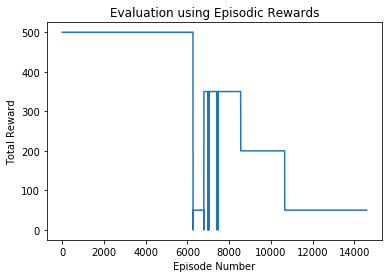

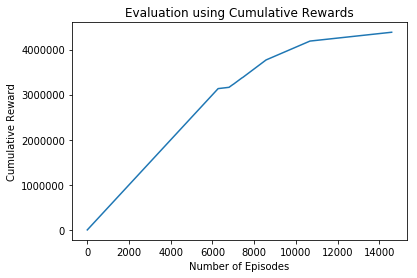

array([    500,    1000,    1500, ..., 4383350, 4383400, 4383450])

In [27]:
def q_learning(): 
    request_list = requests() 
    #print request_list 
    get_item_array = [] 
    get_action_array = [] 
    reward_array = [] 
    cumulative_array = [] 
    for req in request_list: 
        r = req.split(' ') 
        reward = 0 
        print req 
        if (r[0].strip() == "STORE"): 
            rack = egreedy(int(r[1])-1) 
            print "rack", rack 
            get_action_array.append(rack)  
            Store(rack, int(r[1]), int(r[2])) 
            #print_warehouse()
        else: #Get request 
            rack, reward = Get(int(r[1]), int(r[2])) 
            reward_array.append(reward) 
            get_item_array.append(int(r[1])) # make get_item_array 
            if (rack != 0): 
                update_Q(int(r[1])-1, rack-1) 
    print_matrix(Q) 
    print probability_distribution(get_item_array) 
    plot(reward_array, "Evaluation using Episodic Rewards", "Episode Number", "Total Reward") 
    cumulative_array = np.cumsum(reward_array) 
    plot(cumulative_array, "Evaluation using Cumulative Rewards", "Number of Episodes", "Cumulative Reward") 
    return cumulative_array 
    #print get_action_array 
q_learning() 
#print_matrix(Q) 


In [28]:
print_warehouse() 
def comparison(): 
    a=[]
    b=[]
    a = total_rewards_egreedy() 
    b = q_learning() 
    print "a = ", len(a) 
    print "b = ", len(b) 
    plt.title("Comparison Graph") 
    plt.xlabel("Number of Episodes") 
    plt.ylabel("Cumulative Rewards") 
    #plt.legend("Egreedy", "Q Learning")
    plt.plot(a, label = "Egreedy") 
    plt.plot(b, label = "Q Learning") 
    plt.legend() 
    plt.show() 
    #plt.close() 
#plot([1,2,3,4])
#comparison() 


    I    

1->(1, 1034049)	
2->(3, 546537)	
3->(5, 468824)	

4->(5, 548988)	
5->(2, 1319535)	
6->(5, 594473)	

7->(5, 566369)	
8->(4, 47327)	
9->(5, 516801)	

10->(5, 598107)	
11->(5, 505972)	
12->(5, 1605292)	

    O    
